In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read in our data
df_full = pd.read_csv('data/2018_missoula_marathon_full.csv')
df_half = pd.read_csv('data/2018_missoula_marathon_half.csv')

### Cleaning & Wrangling

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 12 columns):
Place        1034 non-null int64
Name         1034 non-null object
City         1012 non-null object
Bib_No       1034 non-null int64
Age          1034 non-null int64
Gender       1034 non-null object
Age_Group    1034 non-null object
Chip_Time    1034 non-null object
Gun_Time     1034 non-null object
Chip_Diff    1028 non-null object
Pace         1034 non-null object
Race         1034 non-null object
dtypes: int64(3), object(9)
memory usage: 97.0+ KB


In [4]:
df_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 12 columns):
Place        2659 non-null int64
Name         2659 non-null object
City         2645 non-null object
Bib_No       2659 non-null int64
Age          2658 non-null float64
Gender       2659 non-null object
Age_Group    2659 non-null object
Chip_Time    2659 non-null object
Gun_Time     2659 non-null object
Chip_Diff    2647 non-null object
Pace         2659 non-null object
Race         2659 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 249.4+ KB


Looking at the info, it appears that we have issues with missing 'City' fields and missingt 'Chip_Diff' fields.

All missing 'City' entries are for race pacers. Let's make an assumption that they are all from Missoula. The missing 'Chip_Diff' entries occur when the chip time and the gun time are the same, so let's replace those with zeros.

There's one more issue to deal with. We're missing an age for one male half marathon runner (bib number 9384). That runner is listed as 'Unknown Participant' and is missing other details as well. Let's drop that record.

In [5]:
#first let's drop our rogue runner
df_half = df_half[df_half.Bib_No != 9384]
df_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 0 to 2658
Data columns (total 12 columns):
Place        2658 non-null int64
Name         2658 non-null object
City         2645 non-null object
Bib_No       2658 non-null int64
Age          2658 non-null float64
Gender       2658 non-null object
Age_Group    2658 non-null object
Chip_Time    2658 non-null object
Gun_Time     2658 non-null object
Chip_Diff    2646 non-null object
Pace         2658 non-null object
Race         2658 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 270.0+ KB


In [6]:
df_half[df_half.City.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race
87,88,Kate Johnson - Pacer,NaN,3400,26.0,F,14/201:25-29,1:45:16.99,1:45:26.48,0:09.49,8:02/M,half
519,520,Ilana Abrahamson -Pacer,NaN,2107,42.0,F,68/211:40-44,2:09:46.25,2:10:25.72,0:39.47,9:54/M,half
520,521,Sara McAllister - Pacer,NaN,3819,35.0,F,103/293:35-39,2:09:46.70,2:10:26.13,0:39.43,9:54/M,half
630,631,Rachel Toor - Pacer,NaN,7029,56.0,F,24/152:55-59,2:14:36.70,2:15:48.73,1:12.03,10:16/M,half
943,944,Theneshia Glaze - Pacer,NaN,3011,41.0,F,117/211:40-44,2:29:50.89,2:31:52.41,2:01.52,11:26/M,half
978,979,Rebecca Garner -Pacer,NaN,2971,52.0,F,68/173:50-54,2:31:05.50,2:33:06.82,2:01.32,11:32/M,half
1903,51,Dillon May - Pacer,NaN,3809,21.0,M,12/32:20-24,1:29:38.56,1:29:42.16,0:03.60,6:51/M,half
1904,52,Nicolas Composto -Pacer,NaN,2578,25.0,M,5/68:25-29,1:29:38.79,1:29:42.21,0:03.42,6:51/M,half
1997,145,Scott Davis - Pacer,NaN,2689,26.0,M,15/68:25-29,1:45:17.19,1:45:26.60,0:09.41,8:02/M,half
2184,332,Danny Tenenbaum - Pacer,NaN,4799,32.0,M,56/97:30-34,2:00:16.96,2:00:39.64,0:22.68,9:11/M,half


In [7]:
df_half.City = df_half.City.fillna('Missoula MT US')

In [8]:
df_half[df_half.City.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race


In [9]:
df_half[df_half.Chip_Diff.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race
707,708,Emily Cheroske,Missoula MT US,5182,22.0,F,66/121:20-24,2:18:57.49,2:18:57.49,NaN,10:36/M,half
1007,1008,Claire Rappold,Missoula MT US,4333,25.0,F,121/201:25-29,2:33:05.99,2:33:05.99,NaN,11:41/M,half
1012,1013,Janice Loudon,Overland Park KS US,3703,58.0,F,62/152:55-59,2:33:41.21,2:33:41.21,NaN,11:44/M,half
1659,1660,Marybeth Healey,Coeur D Alene ID US,3160,57.0,F,128/152:55-59,3:32:18.86,3:32:18.86,NaN,16:12/M,half
1788,1789,Dawn Clark,Butte MT US,2546,59.0,F,146/152:55-59,4:00:36.85,4:00:36.85,NaN,18:22/M,half
1808,1809,Amanda Ledoux,Spokane Valley WA US,3644,44.0,F,202/211:40-44,4:09:38.16,4:09:38.16,NaN,19:03/M,half
1809,1810,Celina Taylor,Spokane WA US,4788,42.0,F,203/211:40-44,4:09:38.62,4:09:38.62,NaN,19:03/M,half
1844,1845,Alina McCue,Missoula MT US,5185,39.0,F,293/293:35-39,4:31:55.15,4:31:55.15,NaN,20:45/M,half
1889,37,Connor Morris,Port Orchard WA US,5298,20.0,M,11/32:20-24,1:26:38.11,1:26:38.11,NaN,6:37/M,half
1923,71,Lucca Wellenstein,Missoula MT US,4993,16.0,M,16/45:15-19,1:33:38.00,1:33:38.00,NaN,7:09/M,half


In [10]:
df_half.Chip_Diff = df_half.Chip_Diff.fillna(0)
df_half[df_half.Chip_Diff.isna()]

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race


In [11]:
#let's fix those same issues with the full results.
df_full.City = df_full.City.fillna('Missoula MT US')
df_full.Chip_Diff = df_full.Chip_Diff.fillna(0)

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 12 columns):
Place        1034 non-null int64
Name         1034 non-null object
City         1034 non-null object
Bib_No       1034 non-null int64
Age          1034 non-null int64
Gender       1034 non-null object
Age_Group    1034 non-null object
Chip_Time    1034 non-null object
Gun_Time     1034 non-null object
Chip_Diff    1034 non-null object
Pace         1034 non-null object
Race         1034 non-null object
dtypes: int64(3), object(9)
memory usage: 97.0+ KB


In [13]:
df_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 0 to 2658
Data columns (total 12 columns):
Place        2658 non-null int64
Name         2658 non-null object
City         2658 non-null object
Bib_No       2658 non-null int64
Age          2658 non-null float64
Gender       2658 non-null object
Age_Group    2658 non-null object
Chip_Time    2658 non-null object
Gun_Time     2658 non-null object
Chip_Diff    2658 non-null object
Pace         2658 non-null object
Race         2658 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 270.0+ KB


Ok. We have our missing/messy values worked out. Next, work our our columns.

The 'Age_Group' field is holding both the runners place out of the total for that age group and the label. For example:

66/121:20-24 - The runner was number 66 out of 121 runners in the 20-24 age group.

Let's drop the total number in the group. We can always calculate that if we need it. And let's split the data into two colums one for place and one for group.

In [14]:
df_half['Age_Group_Place'], df_half['Age_Group'] = df_half.Age_Group.str.split(':', 1).str
df_half['Age_Group_Place'], _ = df_half.Age_Group_Place.str.split('/', 1).str

In [15]:
df_full['Age_Group_Place'], df_full['Age_Group'] = df_full.Age_Group.str.split(':', 1).str
df_full['Age_Group_Place'], _ = df_full.Age_Group_Place.str.split('/', 1).str

Let's trim off the '/M' in Pace in case we want to use it numerically.

In [16]:
df_full.Pace = df_full.Pace.str[:-2]
df_half.Pace = df_half.Pace.str[:-2]

In [17]:
df_half.head()

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place
0,1,Makena Morley,Bigfork MT US,2051,21.0,F,20-24,1:15:50.45,1:15:51.79,0:01.34,5:47,half,1
1,2,Misiker Demessie,Colorado Springs CO US,2060,31.0,F,30-34,1:18:03.69,1:18:05.58,0:01.89,5:57,half,1
2,3,Kelsi Lasota,Estes Park CO US,2052,22.0,F,20-24,1:18:41.68,1:18:43.68,0:02.00,6:00,half,2
3,4,Elizabeth Wasserman,Goshen NY US,2056,23.0,F,20-24,1:19:18.71,1:19:20.92,0:02.21,6:03,half,3
4,5,Andrea Masterson,Seattle WA US,2053,21.0,F,20-24,1:21:38.93,1:21:40.32,0:01.39,6:14,half,4


In [18]:
df_full.head()

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place
0,1,Keely Baker,Great Falls MT US,52,26,F,25-29,2:51:46.12,2:51:48.01,0:01.89,6:33,full,1
1,2,Trisha Drobeck,Missoula MT US,51,38,F,35-39,2:53:28.28,2:53:30.08,0:01.80,6:37,full,1
2,3,Chelsea Dana,Billings MT US,355,35,F,35-39,3:01:37.43,3:01:43.04,0:05.61,6:56,full,2
3,4,Evie Tate,Missoula MT US,1211,23,F,20-24,3:09:32.24,3:09:45.38,0:13.14,7:14,full,1
4,5,Erin Forde,Missoula MT US,56,25,F,25-29,3:09:37.84,3:09:41.66,0:03.82,7:14,full,2


Looks good. Let's combine and save the output...in hindsight, we should have combined sooner and saved ourselves some steps, but I didn't think I was going to until just now. Oh well, live and learn.

In [19]:
df_all = pd.concat([df_full, df_half])

In [20]:
df_all.sample(10)

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place
166,167,Emily Austin,Sheridan WY US,2197,28.0,F,25-29,1:52:38.17,1:53:18.36,0:40.19,8:36,half,23
619,147,Peter Olsen,Missoula MT US,913,35.0,M,35-39,3:47:56.76,3:48:06.90,0:10.14,8:42,full,32
2156,304,Will Mitchell,Bozeman MT US,5216,49.0,M,45-49,1:58:45.47,1:59:19.47,0:34.00,9:04,half,32
552,80,Keith Carman,Helena MT US,275,26.0,M,25-29,3:28:28.84,3:28:43.68,0:14.84,7:57,full,16
2377,525,Brett McNutt,Greenacres WA US,3888,28.0,M,25-29,2:21:45.67,2:23:30.44,1:44.77,10:49,half,48
126,127,Rachel Grabow,Dallas TX US,473,34.0,F,30-34,4:14:11.37,4:15:00.18,0:48.81,9:42,full,18
627,628,Shelley Kirilenko,London LND GB,3506,57.0,F,55-59,2:14:29.49,2:15:47.41,1:17.92,10:16,half,23
551,79,Shimpei Takai,Allentown PA US,1207,31.0,M,30-34,3:28:26.03,3:28:38.08,0:12.05,7:57,full,20
454,455,Kristin Nye,Wilmington DE US,902,36.0,F,35-39,6:45:11.67,6:46:51.87,1:40.20,15:28,full,71
508,509,Jessica Cook,Missoula MT US,2592,33.0,F,30-34,2:09:17.71,2:10:44.93,1:27.22,9:52,half,116


Let's save it and move on to analysis.

In [21]:
df_all['Chip_Time_Minutes'] = pd.to_timedelta(df_all.Chip_Time).dt.total_seconds()/60
df_all['Gun_Time_Minutes'] = pd.to_timedelta(df_all.Gun_Time).dt.total_seconds()/60
df_all['Chip_Diff_Seconds'] = (df_all.Gun_Time_Minutes - df_all.Chip_Time_Minutes)*60

In [22]:
df_all.head()

,Place,Name,City,Bib_No,Age,Gender,Age_Group,Chip_Time,Gun_Time,Chip_Diff,Pace,Race,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds
0,1,Keely Baker,Great Falls MT US,52,26.0,F,25-29,2:51:46.12,2:51:48.01,0:01.89,6:33,full,1,171.768667,171.800167,1.89
1,2,Trisha Drobeck,Missoula MT US,51,38.0,F,35-39,2:53:28.28,2:53:30.08,0:01.80,6:37,full,1,173.471333,173.501333,1.80
2,3,Chelsea Dana,Billings MT US,355,35.0,F,35-39,3:01:37.43,3:01:43.04,0:05.61,6:56,full,2,181.623833,181.717333,5.61
3,4,Evie Tate,Missoula MT US,1211,23.0,F,20-24,3:09:32.24,3:09:45.38,0:13.14,7:14,full,1,189.537333,189.756333,13.14
4,5,Erin Forde,Missoula MT US,56,25.0,F,25-29,3:09:37.84,3:09:41.66,0:03.82,7:14,full,2,189.630667,189.694333,3.82


In [23]:
df_all['Pace_Decimal'] = np.where(df_all.Race == 'full', df_all.Chip_Time_Minutes/26.2, df_all.Chip_Time_Minutes/13.1)

Fix our data types

In [24]:
df_all.Race = df_all.Race.astype('category')
df_all.Age_Group_Place = df_all.Age_Group_Place.astype('int32')

In [25]:
df_all.describe()

,Place,Bib_No,Age,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds,Pace_Decimal
count,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000,3692.000000
mean,626.201788,2957.951246,41.475623,65.133261,186.360980,188.007287,98.778448,11.252631
std,505.587348,1632.593848,13.657386,61.065528,73.533441,73.693673,80.275205,2.891586
min,1.000000,1.000000,10.000000,1.000000,67.856500,67.856500,0.000000,5.179885
25%,231.000000,1298.750000,31.000000,20.000000,129.073458,130.385250,32.625000,9.131054
50%,462.000000,3136.500000,40.000000,45.000000,163.896333,166.416917,78.815000,10.753575
75%,930.250000,4313.250000,52.000000,89.000000,231.915833,233.535417,145.535000,12.792576
max,1853.000000,7032.000000,85.000000,293.000000,472.856333,473.926167,737.910000,30.162748


In [26]:
#I think we're done with our cleaning and feature engineering. Let's save a copy.
df_all.to_csv('data/2018_missoula_marathon_all_clean.csv', index=False)

### Exploration

Let's start by looking at some of our numeric values.

In [27]:
#let's start by updating our 'half' and 'full' data frames.
df_full = df_all[df_all.Race == 'full']
df_half = df_all[df_all.Race == 'half']

In [28]:
df_full.describe()

,Place,Bib_No,Age,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds,Pace_Decimal
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,260.872340,833.135397,41.327853,30.250484,278.160529,279.054454,53.635493,10.616814
std,152.515542,763.499283,12.466329,20.927342,58.572159,59.052299,36.166043,2.235579
min,1.000000,1.000000,13.000000,1.000000,147.876500,147.891667,0.000000,5.644141
25%,130.000000,430.250000,31.000000,12.250000,235.323250,235.769458,22.160000,8.981803
50%,259.000000,773.500000,40.000000,27.000000,270.533500,271.499583,48.320000,10.325706
75%,388.000000,1113.750000,51.000000,45.000000,314.664333,315.965833,82.325000,12.010089
max,561.000000,7012.000000,80.000000,89.000000,472.856333,473.926167,178.840000,18.047952


### Full
**Age**
- Min/Max: 13/80
- Mean: 41.33
- Std Dev: 12.47

**Chip Time in Minutes**
- Min/Max: 147.88/472.86
- Mean: 278.16
- Std Dev: 59.05

**Pace**
- Min/Max: 5.64/18.05
- Mean: 10.62
- Std Dev: 2.24

In [29]:
df_half.describe()

,Place,Bib_No,Age,Age_Group_Place,Chip_Time_Minutes,Gun_Time_Minutes,Chip_Diff_Seconds,Pace_Decimal
count,2658.000000,2658.000000,2658.000000,2658.00000,2658.000000,2658.000000,2658.000000,2658.000000
mean,768.320166,3784.534989,41.533108,78.70316,150.649642,152.588638,116.339703,11.499973
std,523.361209,1017.588079,14.095374,65.97093,40.278087,41.321930,85.684305,3.074663
min,1.000000,732.000000,10.000000,1.00000,67.856500,67.856500,0.000000,5.179885
25%,333.000000,2920.250000,31.000000,26.00000,120.931167,121.994625,40.975000,9.231387
50%,665.000000,3772.500000,40.000000,60.00000,143.679667,145.735917,102.980000,10.967913
75%,1188.750000,4635.750000,52.000000,117.00000,172.899375,175.774125,182.555000,13.198426
max,1853.000000,7032.000000,85.000000,293.00000,395.132000,400.393500,737.910000,30.162748


### Half
**Age**
- Min/Max: 10/85
- Mean: 41.53
- Std Dev: 14.1

**Chip Time in Minutes**
- Min/Max: 67.86/395.13
- Mean: 150.65
- Std Dev: 40.28

**Pace**
- Min/Max: 5.18/30.16
- Mean: 11.5
- Std Dev: 3.07

In [30]:
#How many in each race?
df_all.Race.value_counts()

half    2658
full    1034
Name: Race, dtype: int64

In [31]:
#Breakdown by gender?
df_all.Gender.value_counts()

F    2326
M    1366
Name: Gender, dtype: int64

In [32]:
#Gender for full?
df_all[df_all.Race=='full'].Gender.value_counts()

M    561
F    473
Name: Gender, dtype: int64

In [33]:
#Gender for half?
df_all[df_all.Race=='half'].Gender.value_counts()

F    1853
M     805
Name: Gender, dtype: int64

Interesting. The full marathon is "roughly" 50/50 men to women. The half is greatly skewed to women.

In [35]:
#hours by age group and gender for full
df_all[df_all.Race=='full'].groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-19      F         4.458812
           M         3.878442
20-24      F         4.347842
           M         4.216637
25-29      F         4.553886
           M         4.154031
30-34      F         4.702098
           M         4.031711
35-39      F         4.719849
           M         4.291318
40-44      F         4.755633
           M         4.142777
45-49      F         5.018312
           M         4.564246
50-54      F         5.393816
           M         4.670256
55-59      F         5.288266
           M         4.944000
60-64      F         5.523234
           M         5.016582
65-69      F         5.818094
           M         5.065590
70-74      F         6.375483
           M         5.518641
75-79      F         7.880939
           M         4.621044
80-99      M         4.528636
Name: Chip_Time_Minutes, dtype: float64

In [36]:
#hours by age group and gender for half
df_all[df_all.Race=='half'].groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-14      F         2.738334
           M         2.332619
15-19      F         2.327352
           M         1.733924
20-24      F         2.335598
           M         1.836160
25-29      F         2.518791
           M         2.164842
30-34      F         2.370338
           M         2.048522
35-39      F         2.475548
           M         2.188634
40-44      F         2.569758
           M         2.217029
45-49      F         2.702901
           M         2.325477
50-54      F         2.812339
           M         2.364170
55-59      F         2.850190
           M         2.434960
60-64      F         2.955022
           M         2.359178
65-69      F         3.286505
           M         2.777554
70-74      F         3.525606
           M         2.958034
75-79      F         3.372020
           M         3.144752
80-99      F         3.784268
           M         3.085224
Name: Chip_Time_Minutes, dtype: float64

In [37]:
df_all[df_all.Race=='full'].groupby(['Age_Group', 'Gender'])['Place'].min()

Age_Group  Gender
 1-19      F          20
           M          14
20-24      F           4
           M          15
25-29      F           1
           M           1
30-34      F           9
           M           3
35-39      F           2
           M           2
40-44      F           8
           M           5
45-49      F          48
           M          39
50-54      F          14
           M          37
55-59      F          61
           M          91
60-64      F          96
           M          76
65-69      F         161
           M         143
70-74      F         432
           M         172
75-79      F         473
           M         359
80-99      M         344
Name: Place, dtype: int64

In [38]:
df_all[df_all.Race=='half'].groupby(['Age_Group', 'Gender'])['Place'].min()

Age_Group  Gender
 1-14      F           33
           M           93
15-19      F            7
           M            9
20-24      F            1
           M            2
25-29      F            9
           M            7
30-34      F            2
           M            8
35-39      F            6
           M            1
40-44      F           20
           M            6
45-49      F           39
           M           22
50-54      F           57
           M           28
55-59      F          134
           M           85
60-64      F          158
           M           60
65-69      F          680
           M           87
70-74      F          990
           M          223
75-79      F          670
           M          418
80-99      F         1690
           M          601
Name: Place, dtype: int64

In [83]:
df_all[df_all.Race=='full'].groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()

Age_Group  Gender
 1-19      F         10.211019
           M          8.881928
20-24      F          9.956889
           M          9.656420
25-29      F         10.428748
           M          9.513048
30-34      F         10.768164
           M          9.232925
35-39      F         10.808815
           M          9.827445
40-44      F         10.890762
           M          9.487275
45-49      F         11.492317
           M         10.452473
50-54      F         12.352251
           M         10.695242
55-59      F         12.110533
           M         11.322138
60-64      F         12.648626
           M         11.488355
65-69      F         13.323878
           M         11.600588
70-74      F         14.600344
           M         12.638108
75-79      F         18.047952
           M         10.582545
80-99      M         10.370922
Name: Pace_Decimal, dtype: float64

In [40]:
df_all[df_all.Race=='half'].groupby(['Age_Group', 'Gender'])['Pace_Decimal'].std()

Age_Group  Gender
 1-14      F         2.777596
           M         2.240671
15-19      F         2.826803
           M         1.486098
20-24      F         2.490917
           M         2.687055
25-29      F         2.574310
           M         2.541247
30-34      F         2.567760
           M         1.982420
35-39      F         2.667422
           M         2.676687
40-44      F         3.068442
           M         2.730167
45-49      F         3.208180
           M         3.324467
50-54      F         2.881329
           M         2.694387
55-59      F         2.814534
           M         2.416217
60-64      F         2.774438
           M         2.533408
65-69      F         2.598027
           M         3.878289
70-74      F         2.665562
           M         3.309942
75-79      F         2.603771
           M         2.746526
80-99      F         0.991902
           M         2.314819
Name: Pace_Decimal, dtype: float64

In [41]:
#make sure we have the latest for some plotting.
df_half = df_all[df_all.Race == 'half']
df_full = df_all[df_all.Race == 'full']

### Questions

- What's the breakdown of gender?
- What's the time breakdown by gender?
- What age group performs the best?
- Where are people coming from for the race?
- Are the winners from nearby?

Let's begin!

### What is the breakdown of gender for each race?

In [62]:
#Gender counts for the full?
df_full.Gender.value_counts()

M    561
F    473
Name: Gender, dtype: int64

In [63]:
#Gender counts for the half?
df_half.Gender.value_counts()

F    1853
M     805
Name: Gender, dtype: int64

Whoa! While the full marathon is "roughly" an even split, the half is heavily skewed towards females! More than twice as many!

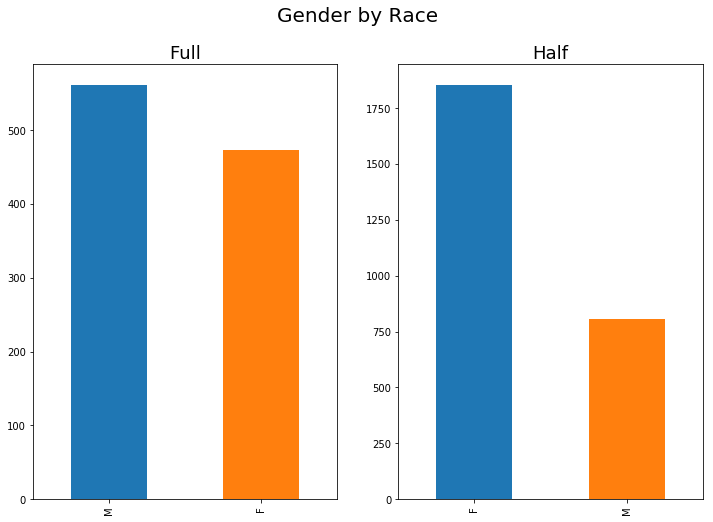

In [71]:
#Let's plot those
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle('Gender by Race', fontsize=20)


df_full.Gender.value_counts().plot.bar(ax=axarr[0])
axarr[0].set_title('Full', fontsize=18)

df_half.Gender.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('Half', fontsize=18)

plt.show();

### What is the time breakdown by gender?

In [74]:
#first let's look at overall time by gender across age groups
df_full.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-19      F         4.458812
           M         3.878442
20-24      F         4.347842
           M         4.216637
25-29      F         4.553886
           M         4.154031
30-34      F         4.702098
           M         4.031711
35-39      F         4.719849
           M         4.291318
40-44      F         4.755633
           M         4.142777
45-49      F         5.018312
           M         4.564246
50-54      F         5.393816
           M         4.670256
55-59      F         5.288266
           M         4.944000
60-64      F         5.523234
           M         5.016582
65-69      F         5.818094
           M         5.065590
70-74      F         6.375483
           M         5.518641
75-79      F         7.880939
           M         4.621044
80-99      M         4.528636
Name: Chip_Time_Minutes, dtype: float64

In [76]:
df_half.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60

Age_Group  Gender
 1-14      F         2.738334
           M         2.332619
15-19      F         2.327352
           M         1.733924
20-24      F         2.335598
           M         1.836160
25-29      F         2.518791
           M         2.164842
30-34      F         2.370338
           M         2.048522
35-39      F         2.475548
           M         2.188634
40-44      F         2.569758
           M         2.217029
45-49      F         2.702901
           M         2.325477
50-54      F         2.812339
           M         2.364170
55-59      F         2.850190
           M         2.434960
60-64      F         2.955022
           M         2.359178
65-69      F         3.286505
           M         2.777554
70-74      F         3.525606
           M         2.958034
75-79      F         3.372020
           M         3.144752
80-99      F         3.784268
           M         3.085224
Name: Chip_Time_Minutes, dtype: float64

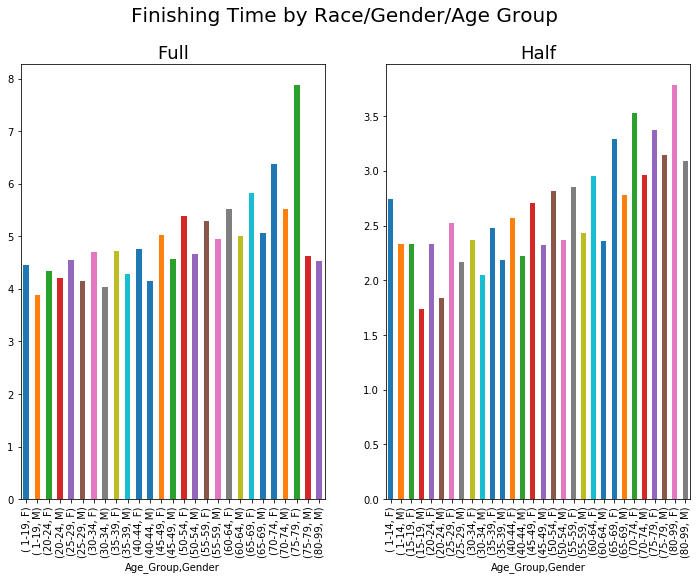

In [82]:
#TODO Fix colors: https://python-graph-gallery.com/11-grouped-barplot/
#Make plot more readable.

#plots
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle('Finishing Time by Race/Gender/Age Group', fontsize=20)


(df_full.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60).plot.bar(ax=axarr[0])
axarr[0].set_title('Full', fontsize=18)

(df_half.groupby(['Age_Group', 'Gender'])['Chip_Time_Minutes'].mean()/60).plot.bar(ax=axarr[1])
axarr[1].set_title('Half', fontsize=18)

plt.show();

In [84]:
#Let's do the same but by pace
df_full.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()

Age_Group  Gender
 1-19      F         10.211019
           M          8.881928
20-24      F          9.956889
           M          9.656420
25-29      F         10.428748
           M          9.513048
30-34      F         10.768164
           M          9.232925
35-39      F         10.808815
           M          9.827445
40-44      F         10.890762
           M          9.487275
45-49      F         11.492317
           M         10.452473
50-54      F         12.352251
           M         10.695242
55-59      F         12.110533
           M         11.322138
60-64      F         12.648626
           M         11.488355
65-69      F         13.323878
           M         11.600588
70-74      F         14.600344
           M         12.638108
75-79      F         18.047952
           M         10.582545
80-99      M         10.370922
Name: Pace_Decimal, dtype: float64

In [ ]:
df_halfdf_full.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()

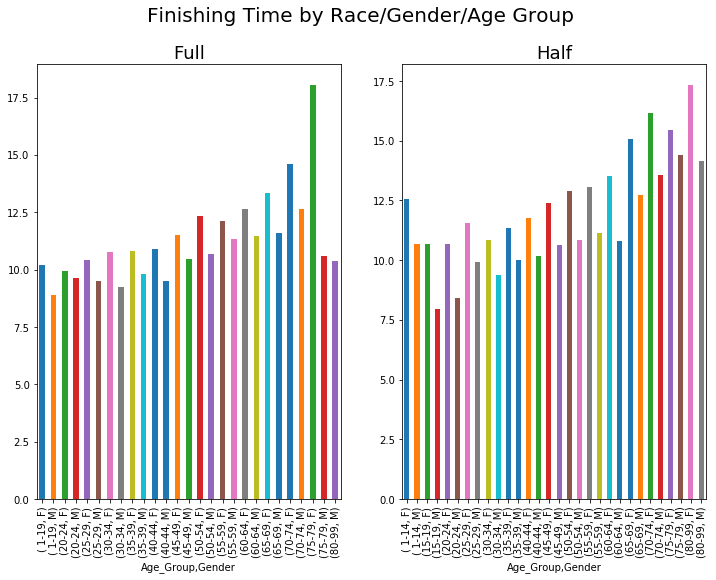

In [85]:
#TODO Fix colors: https://python-graph-gallery.com/11-grouped-barplot/
#Make plot more readable.

#plots
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
plt.suptitle('Mean Pace by Race/Gender/Age Group', fontsize=20)


(df_full.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[0])
axarr[0].set_title('Full', fontsize=18)

(df_half.groupby(['Age_Group', 'Gender'])['Pace_Decimal'].mean()).plot.bar(ax=axarr[1])
axarr[1].set_title('Half', fontsize=18)

plt.show();

Interesting. In all cases, men have a faster mean pace/finish time than women of the same age group.

### What age group(s) perform best for each race?

### Where are people coming from for the race?

### Does location determine the winners? Are winners from nearby?

### Plots

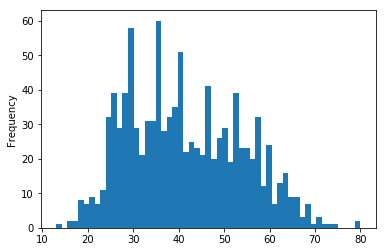

In [55]:
df_full.Age.plot.hist(bins=55);


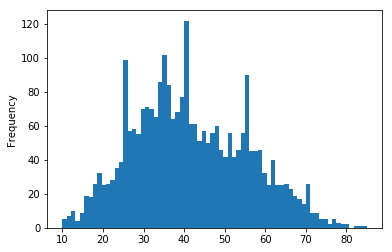

In [53]:
df_half.Age.plot.hist(bins=70)

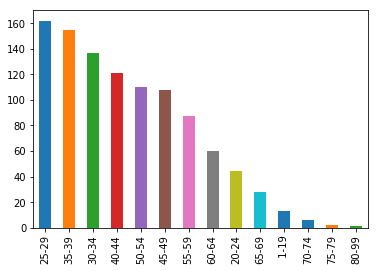

In [59]:
df_full.Age_Group.value_counts().plot.bar()

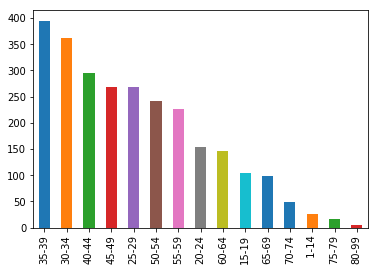

In [60]:
df_half.Age_Group.value_counts().plot.bar()